# Explore here

In [26]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

load_dotenv()


client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [27]:
mbv_uri = 'spotify:artist:3G3Gdm0ZRAOxLrbyjfhii5'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

results = spotify.artist_top_tracks(mbv_uri)
results

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3G3Gdm0ZRAOxLrbyjfhii5'},
      'href': 'https://api.spotify.com/v1/artists/3G3Gdm0ZRAOxLrbyjfhii5',
      'id': '3G3Gdm0ZRAOxLrbyjfhii5',
      'name': 'my bloody valentine',
      'type': 'artist',
      'uri': 'spotify:artist:3G3Gdm0ZRAOxLrbyjfhii5'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/3GH4IiI6jQAIvnHVdb5FB6'},
    'href': 'https://api.spotify.com/v1/albums/3GH4IiI6jQAIvnHVdb5FB6',
    'id': '3GH4IiI6jQAIvnHVdb5FB6',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b2730ede770070357575bc050511',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e020ede770070357575bc050511',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d000048510ede770070357575bc050511',
      'width': 64}],
    'is_playable': True,
    'name': 'Love

In [40]:
for r in results:
    print(r)

tracks


In [44]:
for k in results['tracks'][0]:
    print(k)

album
artists
disc_number
duration_ms
explicit
external_ids
external_urls
href
id
is_local
is_playable
name
popularity
preview_url
track_number
type
uri


In [51]:
tracks_info = []

for track in results['tracks']:

    title = track['name']
    album = track['album']['name']
    duration = track['duration_ms']/1000./60.
    populatiry = track['popularity']

    track_info = {'Name': title,
                  'Album': album,
                  'Length (min)': duration,
                  'Popularity': populatiry}
    
    tracks_info.append(track_info)

In [52]:
df = pd.DataFrame(tracks_info)
df.sort_values('Popularity')
df

,Name,Album,Length (min),Popularity
0,When You Sleep,Loveless,4.198883,65
1,Only Shallow,Loveless,4.291983,55
2,Sometimes,Loveless,5.320433,54
3,Soon,Loveless,6.978433,49
4,Loomer,Loveless,2.638433,48
5,To Here Knows When,Loveless,5.520433,48
6,Off Your Face,Glider,4.257100,47
7,I Only Said,Loveless,5.573333,46
8,Come in Alone,Loveless,3.980667,46
9,only tomorrow,m b v,6.360433,50


<Axes: xlabel='Length (min)', ylabel='Popularity'>

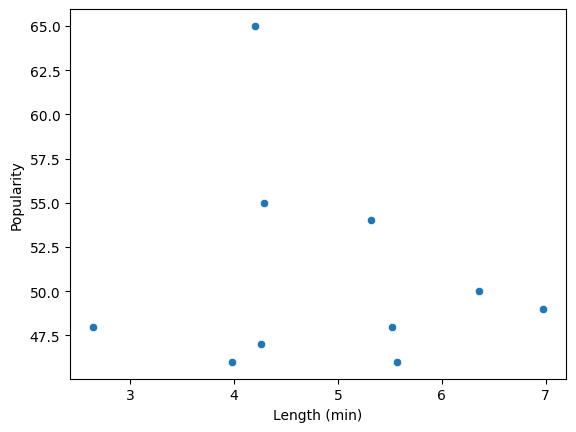

In [53]:
import seaborn as sns

sns.scatterplot(data=df, x='Length (min)', y='Popularity')